## MT09 - TP3 - Automne 2025
### Factorisation de Choleski. Méthode de Newton

### 1. Programmation de la factorisation de Choleski sous forme vectorielle
Pour une matrice $A$ ***symétrique définie positive***, programmez la factorisation de Choleski :

\begin{align*}
& b_{11} = \sqrt{a_{11}},\quad b_{i1}=\frac{a_{i1}}{b_{11}}, \ \text{ pour } i>1, \\[1.5ex]
& b_{jj} = \sqrt{a_{jj}-\sum_{k=1}^{j-1} b_{jk}^2},\ \text{ pour } j\geq 2,\quad
b_{ij}  =\frac{1}{b_{jj}} \left( a_{ij}-\sum_{k=1}^{j-1} b_{ik} b_{jk}\right),\ 1<j<i.
\end{align*}

dans une fonction

```
def choleski(A):
    ...
    return B
```

en remplaçant les sommations par des produits scalaires dans le code (attention aux indices démarrant à 0 en python). 

In [88]:
import numpy as np

def choleski(A):
    # A compléter ...
    B = np.zeros(A.shape)
    for j in range(A.shape[1]):
        for i in range(j,A.shape[0]):
            if i==j:
                B[i][j]=A[i][j]
                for k in range(0,j):
                    B[i][j]-=B[i][k]*B[i][k]
                B[i][j]=np.sqrt(B[i][j])
            else:
                B[i][j]=A[i][j]
                for k in range(0,j):
                    B[i][j]-=B[i][k]*B[j][k]
                B[i][j]/=B[j][j]
    # fini
    return B

Appliquez la factorisation de Choleski à la matrice

$$
A = \begin{pmatrix}
2 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 2
\end{pmatrix}.
$$

et vérifiez que $B B^T = A$.

In [89]:
A=np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
B=choleski(A)
print(B@B.T)

[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]



Question subsidiaire : peut-on s'arranger pour se limiter à deux boucles imbriquées, voire à une seule boucle ? (indication : en vectorisant, puis en travaillant par bloc). A faire s'il vous reste du temps, à la fin du TP par exemple).

### 2. Méthode de Newton-Raphson (méthode de Newton, cas vectoriel)

La méthode de Newton-Raphson permet de résoudre numériquement un système d'équations algébriques non-linéaires écrit sous forme vectorielle condensée

$$
\mathbf{F}(\mathbf{x}) = \mathbf{0}.
$$

La méthode itérative s'écrit

\begin{align*}
& \mathbf{x}^{(0)} \text{ donné}, \\[1.3ex]
& \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - [J(\mathbf{x}^{(k)})]^{-1}\, \mathbf{F}(\mathbf{x}^{(k)})
\end{align*}

en partant de $\mathbf{x}^{(0)}$ (initialisation, dit 'initial guess'). La matrice
$J(\mathbf{x}^{(k)})$ est la matrice jacobienne de $\mathbf{F}$ au point 
$\mathbf{x}^{(k)}$ (voir cours/poly).

En pratique, on procède en deux étapes: on résout d'abord le système linéaire

$$
J(\mathbf{x}^{(k)}) \, \mathbf{w}^{(k)} = -\mathbf{F}(\mathbf{x}^{(k)}),
$$

puis on fait l'affectation

$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{w}^{(k)}.
$$

Ecrire une fonction `python`
```
xout, kout, Fout = newtonRaphson(x0, foncjac, kmax, tol)
```
qui résout l'équation $F(x)=0$ avec la méthode de Newton-Raphson avec ```x0``` l'initial guess, la fonction `python` générique
```
F, J = foncjac(x)
``` 
étant supposée retourner la fonction $F$ ainsi que sa matrice jacobienne $J(\mathbf{x})=DF(\mathbf{x})=(\partial F_i/\partial x_j)_{ij}$ au point trouvé, $k_{max}$ est le nombre max d'itérations de Newton,  $tol$ est la tolérance de convergence : on fera le test

$$
\frac{\|\mathbf{F}(\mathbf{x}^{(k)})\|}{\|\mathbf{F}(\mathbf{x}^{(0)})\|} > tol
$$

(si oui et si $k<k_{max}$ on continue, sinon on s'arrête).

L'utilisation de ```newtonRaphson()``` suppose que la fonction ```foncjac()``` a été préalablement définie, en dehors de la méthode de Newton.

La fonction ```newtonRaphson()``` doit retourner $x_{out}$ la solution trouvée, $k_{out}$ le numéro de dernière itération et $\mathbf{F}_{out}=\mathbf{F}(\mathbf{x}_{out})$ le 'résidu vecteur'.

NOTA BENE : on remarquera que ```python``` autorise le passage de fonctions (ici ```foncjac()```) en arguments de fonctions `python`. Il s'agit bien de l'objet 'fonction', et non de l'évaluation de la fonction en un point.
La fonction ```foncjac()``` pourra ensuite être évaluée aux itérés de la méthode de Newton-Raphson dans ```newtonRaphson()```.

In [90]:
import numpy as np
import numpy.linalg as la

def newtonRaphson(x0, foncjac, kmax, tol):
    k=0
    xk = x0
    # ...
    F0,J=foncjac(x0)
    Fk=F0
    while (la.norm(Fk)/la.norm(F0))>tol and k<kmax:
        Fk,J=foncjac(xk)
        wk=la.solve(J,-Fk)
        xk=xk+wk
        k+=1
    xout=xk
    kout=k
    Fout=Fk
    #fini
    return xout, kout, Fout

Vérification : écrire la fonction ```foncjac()``` et tester la fonction ```newtonRaphson()``` pour la fonction à 2 variables
$\mathbf{x}=(x_1,x_2)$ :

$$
\mathbf{f}(\mathbf{x}) = \begin{pmatrix} x_1^2 - 2 \\ x_1^4 + x_2^2 - 5 \end{pmatrix} 
$$

en prenant $\mathbf{x}^0=(4,2)$, $k_{max}=16$, $tol=10^{-15}$. Quels sont les zéros de $\mathbf{f}$ ?

In [91]:
# Exemple
def foncjac(x):
    # ...
    F=np.array([x[0]**2-2,x[0]**4+x[1]**2-5])
    J=np.array([[2*x[0],0],[4*x[0]**3,2*x[1]]])
    return F, J
# ...
x0=[4,2]
kmax=16
tol=pow(10,-15)

xout, kout, Fout = newtonRaphson(x0, foncjac, kmax, tol)
print('xout = ', xout, "\nkout = ", kout, "\nRésidu = ", Fout)
# Verif
print('Erreur =', np.sqrt(2) - xout[0], 1.0 - xout[1])

xout =  [1.41421356 1.        ] 
kout =  12 
Résidu =  [-4.4408921e-16  0.0000000e+00]
Erreur = 0.0 4.440892098500626e-16


### 3. Problème inverse, identification paramétrique, solutions de systèmes d'équations algébriques, 

Un modèle simplifié de croissance cellulaire avec saturation donne l'évolution de la densité de cellules $\rho(t)$ au cours du temps $t$ :
$$
\rho(t) = \rho_M\, \frac{e^{\alpha t}}{\frac{\rho_M}{\rho_0}-1 + e^{\alpha t}},
\qquad t>0,
$$

où $\rho_0$ est la densité initiale, $\rho_M$ est la densité maximale $(\rho_M\gg \rho_0)$, et $\alpha$ est le taux de croissance cellulaire dans la phase exponentielle. 

Tracer la fonction $t\mapsto \rho(t)$ sur l'intervalle $[0,10]$ pour les paramètres
$(\rho_0,\rho_,\alpha)=(3, 1000, 1.2)$.

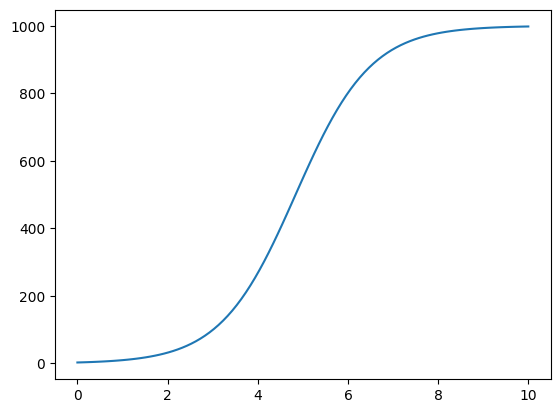

In [92]:
x=np.linspace(0,10,100)
import matplotlib.pyplot as plt
rt=1000*np.exp(1.2*x)/(1000/3-1+np.exp(1.2*x))
plt.plot(x,rt)
plt.show()

Les quantités $\rho_M$ et $\alpha$ sont d'intérêt biologique, mais ne sont pas des observables (ne peuvent pas être mesurées directement).
Expérimentalement, on peut compter le nombre de cellules sur un élément de surface, on peut donc mesurer la densité à un temps de prolifération donné.

À partir de trois mesures de densité de cellules à rois instants différents, on peut
espérer déterminer les trois paramètres $\rho_0$, $\rho_M$ et $\alpha$ du modèle.

Supposons que les trois mesures sont les suivantes :

| Temps $t^k$        | Densité $\rho(t^k)$ | 
| :---------------- | :------: | 
| 2.0               |   32.104 | 
| 4.0               |  267.726 | 
| 8.0               |  977.987 | 

À partir des mesures, déterminer les paramètres $\rho_0$, $\rho_M$ et $\alpha$.
Pour cela, dans un premier temps, écrivez le système d'équations  $\mathbf{F}(\mathbf{x})=0$ à résoudre.

En utilisant `scipy.optimize.fsolve()` (voir l'aide associée), résoudre le problème. On pourra utiliser l'initialisation :

```
X0 = np.array([1.0, 2000.0, 1.0]) # X0=(rho0, rhoM, alpha) initial guess 
```

Affichez les valeurs de  $\rho_0$, $\rho_M$ et $\alpha$ ainsi obtenues.
Arrondir les valeurs à deux décimales en utilisant `np.round(...,2)`.


In [93]:
def F(X):
    # ....
    rho0=X[0]
    rhoM=X[1]
    alpha=X[2]
    T=[2,4,8]
    D=[32.104,267.726,977.987]

    f1=rhoM*np.exp(alpha*T[0])/(rhoM/rho0-1+np.exp(alpha*T[0]))-D[0]
    f2=rhoM*np.exp(alpha*T[1])/(rhoM/rho0-1+np.exp(alpha*T[1]))-D[1]
    f3=rhoM*np.exp(alpha*T[2])/(rhoM/rho0-1+np.exp(alpha*T[2]))-D[2]

    #fini
    return np.array([f1,f2,f3])


from scipy.optimize import fsolve

X0 = np.array([1.0, 2000.0, 1.0])

Xsol, infodict, ier, mesg = fsolve(F, X0, full_output=True)

print(infodict)

{'nfev': 27, 'fjac': array([[-0.15555544, -0.98174627, -0.10943841],
       [-0.02585521, -0.10670263,  0.99395476],
       [ 0.98748874, -0.15744462,  0.00878508]]), 'r': array([-6.54560639e+01, -1.61890220e-01, -7.87285668e+02,  9.22863100e-01,
        1.00575407e+02, -6.18274819e+01]), 'qtf': array([ 3.00092068e-08,  9.62976874e-08, -8.41232658e-09]), 'fvec': array([ 5.90034688e-11,  3.48620688e-10, -1.94404493e-11])}


In [94]:
rho0, rhoM, alpha = Xsol
print('rho0 = ', np.round(rho0,2) )
print('rhoM = ', np.round(rhoM,2) )
print('alpha = ', np.round(alpha,2) )

rho0 =  3.0
rhoM =  1000.0
alpha =  1.2


In [95]:
?fsolve